In [7]:
import matplotlib.pyplot as plt
import numpy as np
import galsim
from astropy.io import fits
from PIL import Image

# COSMOS HST

In [34]:

hdu = fits.open('../data/acs_I_095751+0228_unrot_sci_20.fits')[0]
cosmos_hst = hdu.data

In [36]:
header = hdu.header

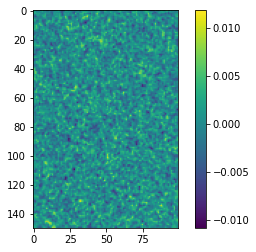

In [73]:
plt.imshow(cosmos_hst[550:700, 1000:1100])
plt.colorbar()

In [32]:
correction_inf = 0.841
zp = 25.7
# zp_flux = np.power(10, ((25.7 - 25.7)*0.4))
flux_inf = 5.1 / correction_inf * zp

In [74]:
np.median(cosmos_hst[550:700, 1000:1100])

0.00027343776

In [60]:
header['EXPTIME']

4056.0

In [76]:
exp_time = header['EXPTIME']
# exp_time = 1
print('cosmos-hst std: ', np.std(cosmos_hst[1100:1200, 1100:1200]), 'count per second')
print('cosmos-hst std: ', np.std(1.e26*header['PHOTFLAM']*cosmos_hst[1100:1200, 1100:1200]/exp_time), '1e-26 erg cm-2 s-1 A-1') #total exposure in cosmos - 2028 (koekmoer et al)
print('cosmos-hst std: ', np.std(1e-2*1e23*header['PHOTFLAM']*cosmos_hst[1100:1200, 1100:1200]/exp_time), 'Jy')
print('cosmos-hst std: ', np.std(1e-2*1e23*header['PHOTFLAM']*cosmos_hst[1100:1200, 1100:1200]/exp_time/1e-3), 'microJy')

# print('sdss std: ', 3.63e-6*np.std(sdss[:25, :25]), 'Jy')
# print('sdss std: ', 3.63e-6*np.std(sdss[:25, :25])/1e-9, 'nJy')

cosmos-hst std:  0.0024606767 count per second
cosmos-hst std:  4.2906294 1e-26 erg cm-2 s-1 A-1
cosmos-hst std:  4.2906293e-05 Jy
cosmos-hst std:  0.04290629 microJy


# SDSS-I

In [49]:
hdu = fits.open('../data/sdss.fits')
sdss = fits.open('../data/sdss.fits')[0].data

sdss std:  0.025689151 nanomaggy
sdss std:  9.32516186311841e-08 Jy
sdss std:  93.25161863118409 nJy
sdss std:  0.0932516186311841 microJy


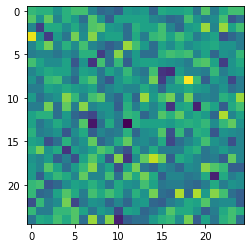

In [52]:
plt.imshow(sdss[:25, :25])
print('sdss std: ', np.std(sdss[:25, :25]), 'nanomaggy')
print('sdss std: ', 3.63e-6*np.std(sdss[:25, :25]), 'Jy')
print('sdss std: ', 3.63e-6*np.std(sdss[:25, :25])/1e-9, 'nJy')
print('sdss std: ', 3.63e-6*np.std(sdss[:25, :25])/1e-6, 'microJy')

# Euclid

In [3]:
hdu = fits.open('../../these/data/morpho-challenge/ssersic_4_vis.fits')

In [4]:
# hdu[0].header

euclid std:  0.0029805652 microJy
euclid std:  2.9805651865899563e-09 Jy
euclid std:  2.9805651865899563 nJy


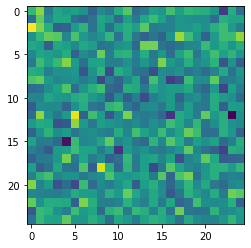

In [5]:
euclid = hdu[0].data
plt.imshow(euclid[:25, :25])
print('euclid std: ', np.std(euclid[:25, :25]), 'microJy')
print('euclid std: ', np.std(euclid[:25, :25])*1e-6, 'Jy')
print('euclid std: ', np.std(euclid[:25, :25])*1e3, 'nJy')
hdu.close()

In [4]:
hdu = fits.open('../../these/data/shuf_vis_0_noise_deep.fits')

euclid std:  0.00047795617 microJy
euclid std:  4.77956171380356e-10 Jy
euclid std:  0.47795617138035595 nJy


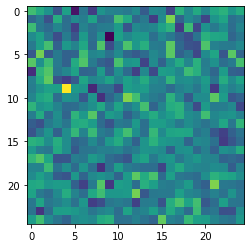

In [5]:
euclid = hdu[0].data
plt.imshow(euclid[:25, :25])
print('euclid std: ', np.std(euclid[:25, :25]), 'microJy')
print('euclid std: ', np.std(euclid[:25, :25])*1e-6, 'Jy')
print('euclid std: ', np.std(euclid[:25, :25])*1e3, 'nJy')


# Cosmos-Web

In [3]:
hdu = fits.open('../data/cosmos-web_simu.fits')

In [6]:
hdu[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  500                                                  
NAXIS2  =                  500                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'SCI     '           / extension name                                 
                                                                                
        JWST ephemeris information                                              
                                                                                
REFFRAME= 'EME2000 '           / Ephemeris reference frame                      
BUNIT   = 'MJy/sr  '        

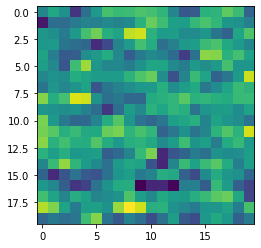

In [10]:
cosmos_web = hdu[1].data
plt.imshow(cosmos_web[25:45, 25:45])

In [18]:
#1sr = 4.25e10 arcsec^2
# 1arcsec = 0.031px
# 1arcsec^2 = (0.031)^2px

# 4.25e10 arcsec^2 = 4.25e10*(0.031)**2 = 40842500 px^2
print('cosmos-web std: ', np.std(cosmos_web[25:45, 25:45]), 'MJy/sr')
print('cosmos-web std: ', np.std(cosmos_web[25:45, 25:45])*1e12, 'microJy/sr')
print('cosmos-web std: ', np.std(cosmos_web[25:45, 25:45])*1e12/4.25e10, 'microJy/arcsec^2')
print('cosmos-web std: ', np.std(cosmos_web[25:45, 25:45])*1e12/40842500, 'microJy/px^2')
print(f'should be 0.7nJy for cosmos 2integrations, i.e. {0.7*1e-3}microJy')

cosmos-web std:  0.04489497 MJy/sr
cosmos-web std:  44894970953.46451 microJy/sr
cosmos-web std:  1.0563522577285767 microJy/arcsec^2
cosmos-web std:  1099.2219123086124 microJy/px^2
should be 0.7nJy for cosmos 2integrations, i.e. 0.0007microJy


In [16]:
4.25e10*(0.031)**2

40842500.0